In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Set up and clean

In [299]:
app = pd.read_csv('googleplaystore.csv')
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [307]:
review=pd.read_csv('googleplaystore_user_reviews.csv')
review=review.drop_duplicates() # removed any duplicate ratings
review=review.dropna(subset=['Sentiment'], inplace=False) # removed any empty ratings
review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [308]:
review=review.drop(['Translated_Review','Sentiment'],axis='columns') # To get only app, polarity and, subjectivity

In [309]:
pol=review.groupby('App')['Sentiment_Polarity'].mean().reset_index() # grouped for polarity
sub=review.groupby('App')['Sentiment_Subjectivity'].mean().reset_index()
count=review.groupby('App')['Sentiment_Polarity'].count().reset_index()# grouped for subjectivity
review=pd.merge(pol,sub,on='App')
review=pd.merge(review,count,on='App')#merged into a dataset
review.rename(columns={'Sentiment_Polarity_x':'Sentiment_Polarity','Sentiment_Polarity_y':'Written_Reviews'},inplace=True)
review

,App,Sentiment_Polarity,Sentiment_Subjectivity,Written_Reviews
0,10 Best Foods for You,0.465906,0.493254,95
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.358227,0.508907,36
2,11st,0.181294,0.443957,40
3,1800 Contacts - Lens Store,0.318145,0.591098,40
4,1LINE – One Line with One Touch,0.196290,0.557315,38
...,...,...,...,...
860,Hotels.com: Book Hotel Rooms & Find Vacation D...,0.098559,0.525508,39
861,Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.223750,0.380365,32
862,Hotstar,0.038178,0.493964,32
863,Hotwire Hotel & Car Rental App,0.187029,0.459717,33


In [310]:
#polarity is how positive the review is, 
#the higher the subjectivity, the more subjective the review is so we reverse by doing 1-subjectivity
#this is because more objectivity holds more weight
review['Overall']=review['Sentiment_Polarity']*(1-review['Sentiment_Subjectivity']) #polarity*(1-subjectivity)
review=review.drop(['Sentiment_Polarity','Sentiment_Subjectivity'],axis=1)

In [323]:
app_rev=pd.merge(app,review,on='App') # we will now only have to work with one dataset

In [312]:
app_rev.isna().sum()

App                0
Category           0
Rating             1
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        0
Android Ver        0
Written_Reviews    0
Overall            0
dtype: int64

In [324]:
app_rev[['Rating','Overall']]=app_rev[['Rating','Overall']].interpolate()# interpolate any missing ratings based on the written reviews

In [534]:
app_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Written_Reviews,Overall,RatingRounded,ReviewsRounded
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,20,0.041779,4.0,1000.0
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,90,0.127946,4.5,14000.0
2,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,5000000,Free,0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up,4,0.132367,4.5,194000.0
3,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12M,100000,Free,0,Everyone,Art & Design,"March 20, 2018",1.1,4.0.3 and up,36,0.137321,4.0,1000.0
4,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25M,500000,Free,0,Everyone,Art & Design;Creativity,"October 11, 2017",1.0.8,4.0.3 and up,38,0.073415,4.5,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,Facebook Pages Manager,BUSINESS,4.0,1279800,Varies with device,50000000,Free,0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device,34,-0.034154,4.0,1280000.0
1225,Facebook Ads Manager,BUSINESS,4.1,19051,Varies with device,1000000,Free,0,Everyone,Business,"August 1, 2018",99.0.0.35.75,4.1 and up,35,0.138462,4.0,19000.0
1226,Garena Free Fire,GAME,4.5,5534114,53M,100000000,Free,0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up,94,0.037900,4.5,5534000.0
1227,Fun Kid Racing - Motocross,FAMILY,4.1,59768,Varies with device,10000000,Free,0,Everyone,Racing;Action & Adventure,"August 7, 2018",3.53,4.2 and up,30,0.092807,4.0,60000.0


## Corrolation

In [448]:
corr=app_rev
corr['Installs']=corr['Installs'].apply(lambda x: int(str(x).replace(",","").replace("+","")))
mask=corr["Size"]=="Varies with device"
masked=pd.DataFrame(corr[~mask])
masked['Size']=masked['Size'].apply(lambda x: f(x))
masked['Price']=masked['Price'].apply(lambda x: float(x.replace("$","")))
corlist=["Rating","Reviews","Size","Installs","Price"]

In [541]:
lis=[]
for i in corlist:
    for j in corlist:
        lis.append([i,j,float(masked[i].corr(masked[j]))])
lis=pd.DataFrame(lis,columns=["First","Second","Corrolate"])
lis_pivot=lis.pivot(index="First",columns="Second",values="Corrolate")
lis_pivot

Second,Installs,Price,Rating,Reviews,Size
First,,,,,
Installs,1.000000,-0.028140,0.023454,0.394090,0.205494
Price,-0.028140,1.000000,-0.003966,-0.026539,-0.015551
Rating,0.023454,-0.003966,1.000000,0.168827,0.133386
Reviews,0.394090,-0.026539,0.168827,1.000000,0.419939
Size,0.205494,-0.015551,0.133386,0.419939,1.000000


<Axes: xlabel='Second', ylabel='First'>

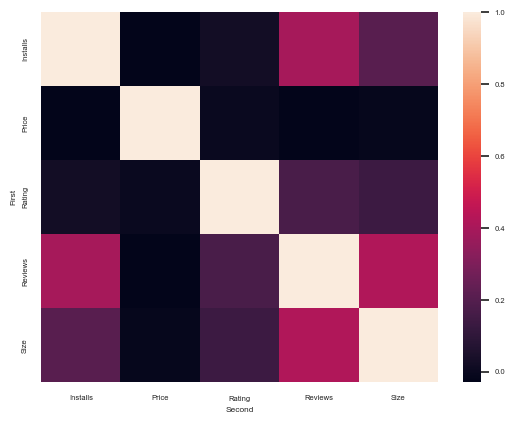

In [485]:
sns.heatmap(data=lis_pivot)

## Best Category

In [53]:
best=app_rev.groupby('Category')['Rating'].mean().reset_index().sort_values('Rating',ascending=False)
best.head()

,Category,Rating
1,AUTO_AND_VEHICLES,4.575000
14,GAME,4.433146
15,HEALTH_AND_FITNESS,4.429310
19,MAPS_AND_NAVIGATION,4.385714
25,PRODUCTIVITY,4.370909


<Axes: xlabel='Rating', ylabel='Category'>

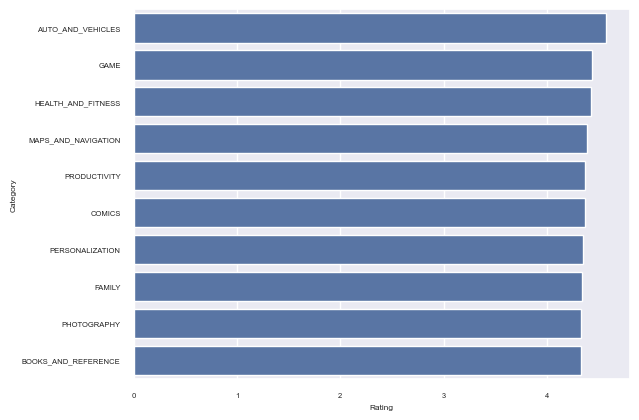

In [63]:
sns.barplot(y='Category',x='Rating',data=best[0:10])

## Most expensive

In [198]:
expens=app_rev

In [113]:
#expens['Price']=expens['Price'].apply(lambda x: float(x.replace("$","")))

In [112]:
app_rev.dtypes

App                 object
Category            object
Rating             float64
Reviews             object
Size                object
Installs            object
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Written_Reviews      int64
Overall            float64
reviews              int64
dtype: object

In [118]:
expens=app_rev.groupby('Category')['Price'].mean().reset_index().sort_values('Price',ascending=False)
expens[0:5] # rest are free

,Category,Price
20,MEDICAL,0.915833
28,SPORTS,0.599800
23,PERSONALIZATION,0.403571
11,FAMILY,0.117353
14,GAME,0.067303


<Axes: xlabel='Price', ylabel='Category'>

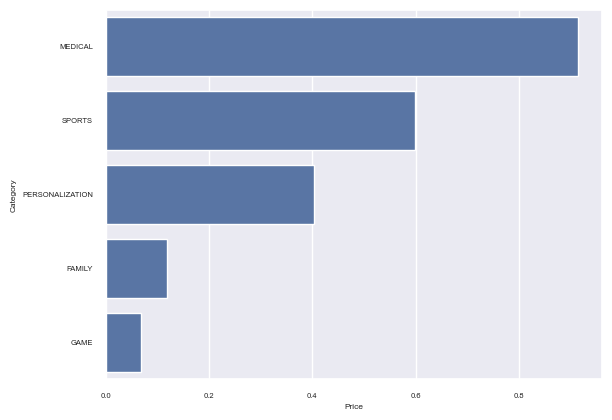

In [121]:
sns.barplot(x='Price',y='Category',data=expens[0:5])

## Installs vs size

In [325]:
In_vs_si=app_rev

In [326]:
In_vs_si

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Written_Reviews,Overall
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,20,0.041779
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,90,0.127946
2,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,"5,000,000+",Free,0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up,4,0.132367
3,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12M,"100,000+",Free,0,Everyone,Art & Design,"March 20, 2018",1.1,4.0.3 and up,36,0.137321
4,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25M,"500,000+",Free,0,Everyone,Art & Design;Creativity,"October 11, 2017",1.0.8,4.0.3 and up,38,0.073415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,Facebook Pages Manager,BUSINESS,4.0,1279800,Varies with device,"50,000,000+",Free,0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device,34,-0.034154
1225,Facebook Ads Manager,BUSINESS,4.1,19051,Varies with device,"1,000,000+",Free,0,Everyone,Business,"August 1, 2018",99.0.0.35.75,4.1 and up,35,0.138462
1226,Garena Free Fire,GAME,4.5,5534114,53M,"100,000,000+",Free,0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up,94,0.037900
1227,Fun Kid Racing - Motocross,FAMILY,4.1,59768,Varies with device,"10,000,000+",Free,0,Everyone,Racing;Action & Adventure,"August 7, 2018",3.53,4.2 and up,30,0.092807


In [327]:
In_vs_si['Installs']=In_vs_si['Installs'].apply(lambda x: int(x.replace(",","").replace("+","")))

In [335]:
mask=In_vs_si["Size"]=="Varies with device"
masked=pd.DataFrame(In_vs_si[~mask])

In [418]:
def f(x):
    if 'M' in x: return float(x.replace("M",""))*1000000
    elif 'k' in x: return float(x.replace("k",""))*1000
    else: return float(x)

In [390]:
#masked['Size']=masked['Size'].apply(lambda x: f(x))

In [359]:
m=masked.groupby(["Size"])["Installs"].mean().reset_index()

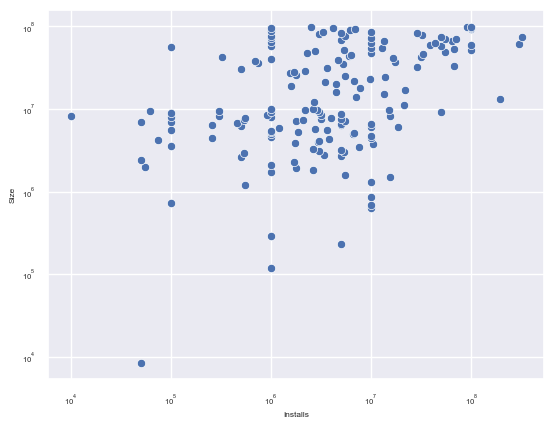

In [360]:
sns.scatterplot(x='Installs',y='Size',data=m,)
plt.xscale('log')
plt.yscale('log')

## Installs vs Rating

In [361]:
In_vs_ra=app_rev

In [364]:
In_vs_ra

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Written_Reviews,Overall
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,20,0.041779
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,90,0.127946
2,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,5000000,Free,0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up,4,0.132367
3,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12M,100000,Free,0,Everyone,Art & Design,"March 20, 2018",1.1,4.0.3 and up,36,0.137321
4,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25M,500000,Free,0,Everyone,Art & Design;Creativity,"October 11, 2017",1.0.8,4.0.3 and up,38,0.073415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,Facebook Pages Manager,BUSINESS,4.0,1279800,Varies with device,50000000,Free,0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device,34,-0.034154
1225,Facebook Ads Manager,BUSINESS,4.1,19051,Varies with device,1000000,Free,0,Everyone,Business,"August 1, 2018",99.0.0.35.75,4.1 and up,35,0.138462
1226,Garena Free Fire,GAME,4.5,5534114,53M,100000000,Free,0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up,94,0.037900
1227,Fun Kid Racing - Motocross,FAMILY,4.1,59768,Varies with device,10000000,Free,0,Everyone,Racing;Action & Adventure,"August 7, 2018",3.53,4.2 and up,30,0.092807


In [378]:
def roundd(x): return round(x*2)/2

In [536]:
In_vs_ra["RatingRounded"]=roundd(In_vs_ra["Rating"])

In [537]:
graph=In_vs_ra.groupby("RatingRounded")["Installs"].mean().reset_index()

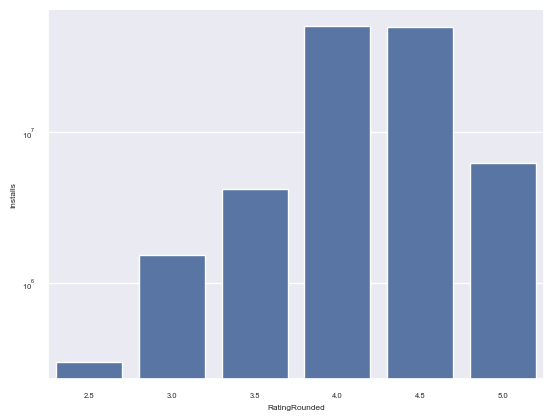

In [538]:
sns.barplot(x='RatingRounded',y='Installs',data=graph)
#plt.xscale("log")
plt.yscale("log")

## Size vs Rating

In [388]:
si_vs_ra=app_rev
si_vs_ra

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Written_Reviews,Overall,RatingRounded
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,20,0.041779,4.0
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,90,0.127946,4.5
2,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,5000000,Free,0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up,4,0.132367,4.5
3,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12M,100000,Free,0,Everyone,Art & Design,"March 20, 2018",1.1,4.0.3 and up,36,0.137321,4.0
4,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25M,500000,Free,0,Everyone,Art & Design;Creativity,"October 11, 2017",1.0.8,4.0.3 and up,38,0.073415,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,Facebook Pages Manager,BUSINESS,4.0,1279800,Varies with device,50000000,Free,0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device,34,-0.034154,4.0
1225,Facebook Ads Manager,BUSINESS,4.1,19051,Varies with device,1000000,Free,0,Everyone,Business,"August 1, 2018",99.0.0.35.75,4.1 and up,35,0.138462,4.0
1226,Garena Free Fire,GAME,4.5,5534114,53M,100000000,Free,0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up,94,0.037900,4.5
1227,Fun Kid Racing - Motocross,FAMILY,4.1,59768,Varies with device,10000000,Free,0,Everyone,Racing;Action & Adventure,"August 7, 2018",3.53,4.2 and up,30,0.092807,4.0


In [414]:
mask=si_vs_ra["Size"]=="Varies with device"
masked=pd.DataFrame(si_vs_ra[~mask]).apply(lambda x: f(x))

TypeError: cannot convert the series to <class 'float'>

In [409]:
mean=masked.groupby(["Size"])["Rating"].mean().reset_index()

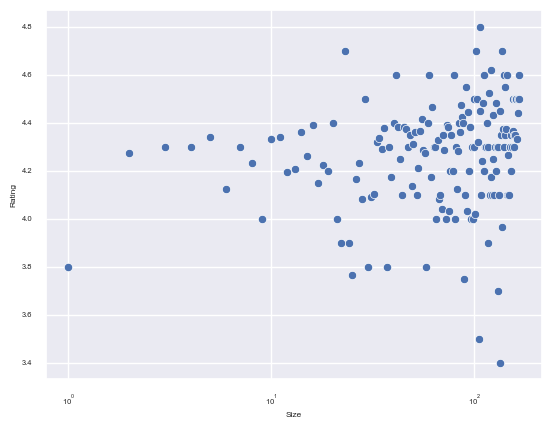

In [410]:
sns.scatterplot(x="Size",y="Rating",data=mean)
plt.xscale("log")

In [411]:
min=masked.groupby(["Size"])["Rating"].min().reset_index()

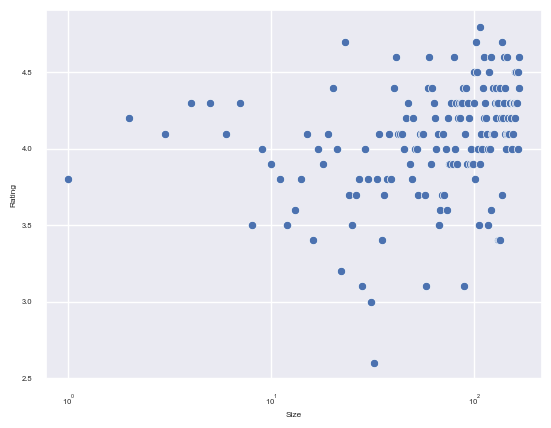

In [412]:
sns.scatterplot(x="Size",y="Rating",data=min)
plt.xscale("log")

In [413]:
si_vs_pr=app_rev

In [416]:
mask=si_vs_pr["Size"]=="Varies with device"
masked=pd.DataFrame(si_vs_pr[~mask])

In [425]:
masked['Price']=masked['Price'].apply(lambda x: float(x.replace("$","")))

In [429]:
si_vs_pr["RatingRounded"]=roundd(si_vs_pr["Rating"])

In [430]:
graph=In_vs_ra.groupby("RatingRounded")["Installs"].mean().reset_index()

<Axes: xlabel='Price', ylabel='Size'>

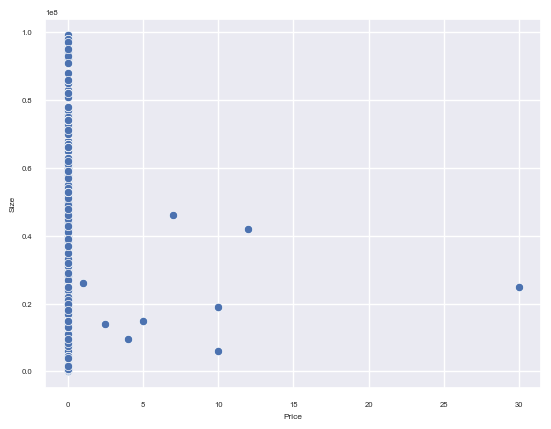

In [427]:
sns.scatterplot(y='Size',x='Price',data=masked)

## Rating vs review

In [517]:
ra_vs_re=app_rev
ra_vs_re['Reviews']=pd.to_numeric(ra_vs_re['Reviews'])

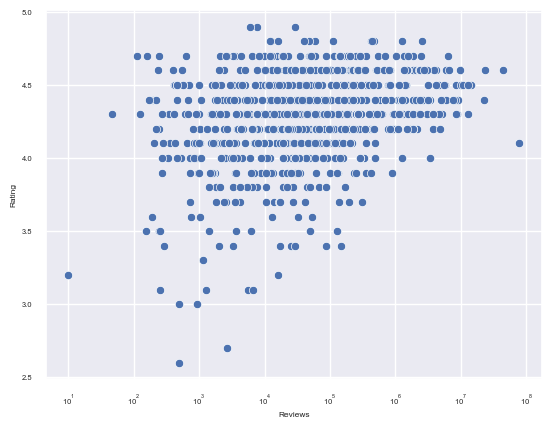

In [528]:
sns.scatterplot(y='Rating',x='Reviews',data=ra_vs_re)
plt.xscale('log')

In [539]:
ra_vs_re['ReviewsRounded']=round(ra_vs_re['Reviews']/10000)*10000
graph=ra_vs_re.groupby('ReviewsRounded')['Rating'].mean().reset_index()
graph

,ReviewsRounded,Rating
0,0.0,4.115196
1,10000.0,4.251938
2,20000.0,4.247826
3,30000.0,4.180000
4,40000.0,4.302273
...,...,...
178,23140000.0,4.600000
179,44880000.0,4.600000
180,44890000.0,4.600000
181,78130000.0,4.100000


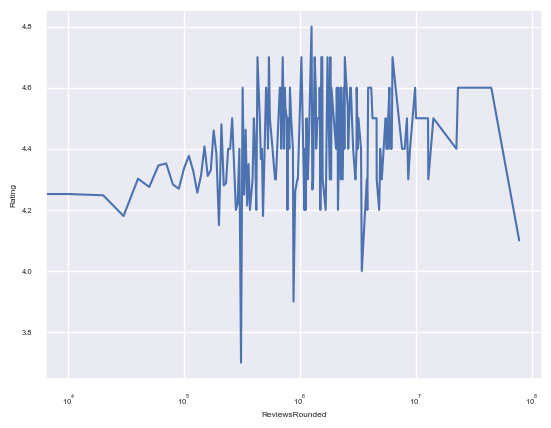

In [540]:
sns.lineplot(y='Rating',x='ReviewsRounded',data=graph)
plt.xscale('log')